# Implementation of kNN classifier from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [2]:
from sklearn.datasets import load_iris
df = load_iris()
X = df.data
y = df.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


## K varies 1 to 31
- stored errors in an array and plot them 
- to visualize optimal value of k

In [4]:
train_error = []
test_error = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled , y_train) # fits training data points

    y_pred1 = knn.predict(X_train_scaled) # prediction on fitted points
    train_error.append(np.mean(y_train != y_pred1)) 

    y_pred2 = knn.predict(X_test_scaled) # predict test dataset
    test_error.append(np.mean(y_test != y_pred2))

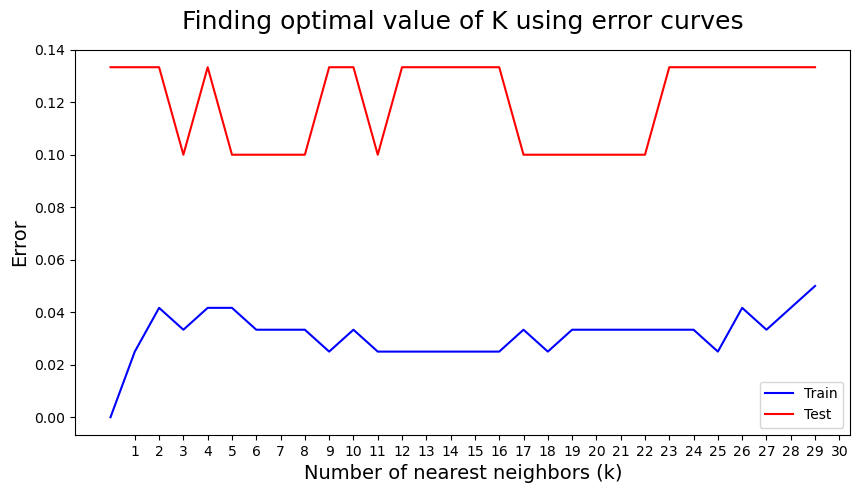

In [5]:
plt.figure(figsize=(10, 5))
plt.plot( train_error, color='b', label="Train")
plt.plot(test_error, color='r', label="Test")
plt.xlabel('Number of nearest neighbors (k)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Finding optimal value of K using error curves', fontsize=18, pad=15)
plt.legend()
plt.xticks(range(1, 31))
plt.show()

##  k = **14** is an optimal choice

In [6]:
knn = KNeighborsClassifier(n_neighbors=14)
# fitting the data
knn.fit(X_train_scaled,y_train)
# predicting
y_pred = knn.predict(X_test_scaled)
print(f'accuracy = {accuracy_score(y_test , y_pred)*100:.2f}%')


accuracy = 86.67%


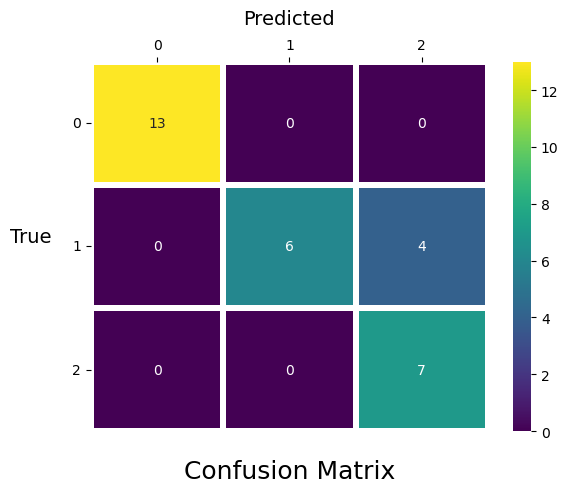

In [7]:
confusionmatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(confusionmatrix, annot=True, linewidth=3, cmap='viridis')
plt.xlabel("Confusion Matrix", fontsize=18, labelpad=20)
ax.xaxis.tick_top()
plt.ylabel("True", fontsize=14, rotation=0, labelpad=30)
plt.yticks(rotation=0)
plt.title("Predicted", fontsize=14, pad=10)
plt.show()

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.60      0.75        10
           2       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.84        30
weighted avg       0.92      0.87      0.86        30

